# Faire la regréssion de chaque variable réponse sur la variable cible "Dose"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
import seaborn as sns


data = pd.read_csv ('data.csv')
data.head(10)

dose  Patient number  Response 1  response 2  Response 3  response 4
0     0               1   -2.944439   -2.857619    0.050000           0
1     1               2   -2.928081   -2.881060    0.050783           0
2     1               3   -2.928081   -2.833669    0.050783           0
3     1               4   -2.928081   -2.853470    0.050783           0
4     0               5   -2.944439   -2.933886    0.050000           0
5     3               6   -2.895365   -2.827908    0.052383           0
6     3               7   -2.895365   -2.817721    0.052383           0
7     3               8   -2.895365   -2.798110    0.052383           0
8     0               9   -2.944439   -2.856590    0.050000           0
9     9              10   -2.797217   -2.724687    0.057475           0

# Etudes des statistiques

In [2]:
data.describe()

dose  Patient number  Response 1  response 2  Response 3  \
count    36.000000       36.000000   36.000000   36.000000   36.000000   
mean    146.083333       18.500000   -0.554809   -0.498339    0.265675   
std     285.718180       10.535654    4.673776    4.667685    0.357837   
min       0.000000        1.000000   -2.944439   -2.933886    0.050000   
25%       0.750000        9.750000   -2.932170   -2.856847    0.050587   
50%      14.500000       18.500000   -2.707248   -2.644474    0.062755   
75%     110.000000       27.250000   -1.145060   -1.077824    0.267545   
max    1000.000000       36.000000   13.413555   13.450094    0.999999   

       response 4  
count   36.000000  
mean     0.250000  
std      0.439155  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.250000  
max      1.000000

In [3]:
type(data)

pandas.core.frame.DataFrame




# Création du modèle 

Pour créer le modèle, vue qu'on a 4 variables explicatives, on doit voir quelles sont les variables qui ont forte relation linéaire avec notre variable cible ce qui nous permet de passer par l'étude de la corrélation linéaire

.


.

# 1. étude de la corrélation

In [4]:
correlation = data.corr()
correlation

dose  Patient number  Response 1  response 2  Response 3  \
dose            1.000000        0.666086    1.000000    0.999984    0.887521   
Patient number  0.666086        1.000000    0.666086    0.665723    0.729862   
Response 1      1.000000        0.666086    1.000000    0.999984    0.887521   
response 2      0.999984        0.665723    0.999984    1.000000    0.888015   
Response 3      0.887521        0.729862    0.887521    0.888015    1.000000   
response 4      0.766291        0.663836    0.766291    0.767062    0.882567   

                response 4  
dose              0.766291  
Patient number    0.663836  
Response 1        0.766291  
response 2        0.767062  
Response 3        0.882567  
response 4        1.000000

On va procéder par une autre méthode qui sera beaucoup plus lisible que la première afin d'en tirer des conclusions par rapport à la corrélation 


.


.

In [5]:
data1 = data[["dose", "Response 1", "response 2", "Response 3", "response 4" ]]
data1.head(5)

dose  Response 1  response 2  Response 3  response 4
0     0   -2.944439   -2.857619    0.050000           0
1     1   -2.928081   -2.881060    0.050783           0
2     1   -2.928081   -2.833669    0.050783           0
3     1   -2.928081   -2.853470    0.050783           0
4     0   -2.944439   -2.933886    0.050000           0

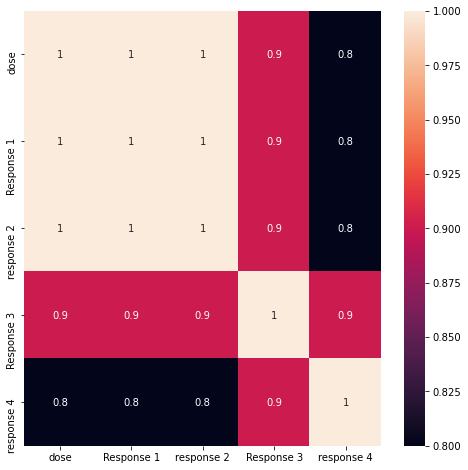

In [6]:
fig, ax = plt.subplots (figsize = (8 , 8))
correlation1 = data1.corr().round(1)
sns.heatmap (data = correlation1, annot = True)
plt.show()

l'analyse du tableau de corrélation montre bien qu'il y'a une forte corrélation entre les différents variables car la plus petite valeur est de 80% et une corrélation parfaite pour certaines.

Pour rappel le coef de corrélation est compris entre -1 et 1, et une corrélation est forte si la valeur tourne autour de 60%.

Ainsi pour la suite on peut dire que nos variables peuvent être soumis au modèle ssi le principe de colinéarité est respecté (c'est à dire qu'une des variables n'est pas une combinaison linéaire des autres variables). Ceci constitue une hypothèse fondamentale pour la regréssion linéaire


.


.

# Analyse de la distribution

l'analyse de la distribution permet de déterminer si la population étudiée est symétrique ou non (s'il y'a des tendances ou des saisonnalités). On sera à mesure de dire s'il s'agit d'une loi normale ou pas

.

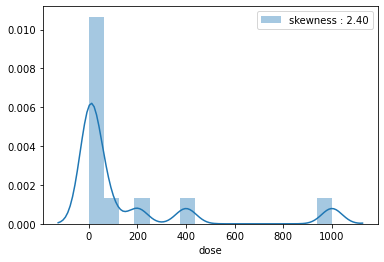

In [7]:
fig = plt.plot (size = (8, 10))
skew = sns.distplot (data["dose"])
skew = skew.legend(['skewness : {:.2f}'.format (data["dose"].skew())])

Rappelons que: skew > 0 distribution positive.skew < 0 distribution négative.skew = 0 distribution symétrique.
Le coefficient trouvé est égale à 2,40 ce qui permet de conclure que la distribution est positive.
Les données salariales présentent souvent une asymétrie de ce type : au sein d'une entreprise, de nombreux employés gagnent relativement peu et, à mesure que les salaires augmentent, le nombre d'employés concernés diminue.

# Observation sur les nuages de points

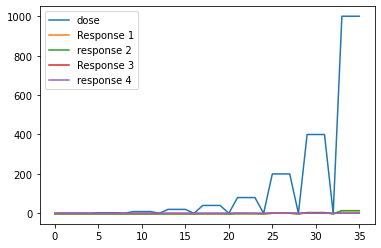

In [8]:
data1.plot()

# Implémentation du modèle 

.

   # On prendra la variable Response 1 comme var explicative 

In [9]:
# Initialisation du modèle

y = data["dose"]
reponse1 = data[["Response 1"]]

regression = linear_model.LinearRegression()
regression.fit(reponse1, y)

# Calcul du coefficient de corrélation

a = regression.score(reponse1, y)
print("le coef de corrélation est égale à", a, "\n")

# Calcul du RMSE

RMSE=np.sqrt(((y - regression.predict(reponse1))**2).sum()/len(y))
print("la somme des carrés résidus", RMSE, '\n')

print( regression.intercept_, "\n", regression.coef_)

plt.plot(y, regression.predict(reponse1))
plt.scatter(y, regression.predict(reponse1))
plt.title("graphe de regression linéaire de la variable dose sur la var reponse1 \n")
plt.xlabel("réponse1")
plt.ylabel("dose")
plt.grid(True)
plt.show()



le coef de corrélation est égale à 1.0 

la somme des carrés résidus 1.3596833509818707e-08 

179.99999999746228 
 [61.13218894]


Y = 61.13218894 X + 179.99999999746228

.

# On prendra la variable response 2 comme variable explicative

In [10]:
y = data["dose"]
reponse2 = data[["response 2"]]

regression.fit (reponse2, y)

# Calcul du coefficient de corrélation

b = regression.score(reponse2, y)
print ("le coefféicient de corrélation est égale à", b, "\n")

# Calcul du RMSE

RMSE_1 = np.sqrt(((y - regression.predict(reponse2))**2).sum()/len(y))
print ("la somme des carrés des résidus est égale à", RMSE_1, "\n")

print (regression.intercept_, "\n", regression.coef_, "\n")

plt.plot(y, regression.predict(reponse2))
plt.scatter(y, regression.predict(reponse2))
plt.title("graphe de regression linéaire de la dose sur la reponse 2 \n")
plt.xlabel("réponse2")
plt.ylabel("dose")
plt.grid(True)
plt.show()

le coefféicient de corrélation est égale à 0.9999682178223598 

la somme des carrés des résidus est égale à 1.5882266266526426 

176.58714763364745 
 [61.21099226] 



Y = 61.21099226 X + 176.58714763364745

.

# On prendra la variable response 3 comme variable explicative

In [11]:
y = data["dose"]
reponse3 = data[["Response 3"]]

regression.fit (reponse3, y)

# Calcul du coef de corrélation

c = regression.score(reponse3, y)
print ("le coef de corrélation est égale à", c, "\n")

# Calcul du RMSE

RMSE_2 = np.sqrt(((y - regression.predict(reponse3))**2).sum()/len(y))
print ("la somme des carrés des résidus est égale à", RMSE_2, "\n")

print (regression.intercept_, "\n", regression.coef_)

plt.plot(y, regression.predict(reponse3))
plt.scatter(y, regression.predict(reponse3))
plt.title("graphe de regression de la variable dose sur la variable reponse3 \n")
plt.xlabel("réponse3")
plt.ylabel("dose")
plt.grid(True)
plt.show()

le coef de corrélation est égale à 0.787693722909658 

la somme des carrés des résidus est égale à 129.80818115993037 

-42.186944121958675 
 [708.64997382]


Y = 708.64997382 X - 42.186944121958675

On note bien ici que la fonction linéaire n'est pas le modèle qu'il faut pour représenter les données, la variable response 3 est peut être pas significative pour expliquer la variable dose.

# On prendra la variable response 4 comme variable explicative

In [12]:
y = data["dose"]
reponse4 = data[["response 4"]]

regression.fit (reponse4, y)

# Calcul du coef de corrélation

d = regression.score(reponse4, y)
print ("le coed de corrélation est égale à", d, "\n")

# Calcule du RMSE

RMSE_3 = np.sqrt (((y - regression.predict(reponse4))**2).sum()/len(y))
print ("la somme des carrés des résidus est de", RMSE_3, "\n")

print (regression.intercept_, "\n", regression.coef_)

plt.plot (y, regression.predict(reponse4))
plt.scatter (y, regression.predict(reponse4))
plt.title ("graphe de regression de la variable dose sur la variable reponse4 \n")
plt.xlabel("réponse4")
plt.ylabel("dose")
plt.grid(True)
plt.show()


le coed de corrélation est égale à 0.5872014205879379 

la somme des carrés des résidus est de 181.00465514783087 

21.44444444444447 
 [498.55555556]


Y = 498.55555556 X + 21.44444444444447

Même chose ici, on remarque que la variable response_4 est peut être pas significative pour expliquer notre variable cible. 